In [1]:
import cv2
import matplotlib.pyplot as plt

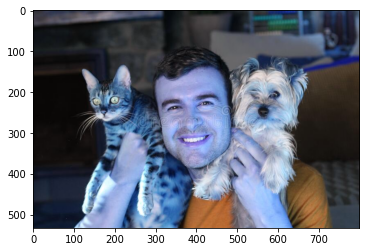

In [2]:
image = cv2.imread('man_cat_dog.jpeg', 1)
original_image = image.copy()
plt.imshow(image)

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [5]:
classes = []
with open('coco.names', 'r') as f:
#     print(f.readlines())
    classes = [line.strip() for line in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
layer_names = net.getLayerNames()

# output_layer = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
output_layer = ['yolo_82', 'yolo_94', 'yolo_106']

In [8]:
layer_names = net.getLayerNames()

In [9]:
layer_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [9]:
output_layer = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [10]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [11]:
height, width,_ = gray_image.shape

In [12]:
blob = cv2.dnn.blobFromImage(gray_image, 0.003, (512, 512), (0, 0, 0), True)

In [13]:
net.setInput(blob)
outs = net.forward(output_layer)

In [14]:
len(outs)

3

[0]
[0.6655833721160889]
[[250, 94, 460, 397]]
[0, 15]
[0.6655833721160889, 0.8503497242927551]
[[250, 94, 460, 397], [100, 124, 247, 404]]
[0, 15, 15]
[0.6655833721160889, 0.8503497242927551, 0.9115743637084961]
[[250, 94, 460, 397], [100, 124, 247, 404], [74, 137, 319, 377]]
[0, 15, 15, 15]
[0.6655833721160889, 0.8503497242927551, 0.9115743637084961, 0.8621479868888855]
[[250, 94, 460, 397], [100, 124, 247, 404], [74, 137, 319, 377], [89, 132, 346, 381]]
[0, 15, 15, 15, 0]
[0.6655833721160889, 0.8503497242927551, 0.9115743637084961, 0.8621479868888855, 0.8277488946914673]
[[250, 94, 460, 397], [100, 124, 247, 404], [74, 137, 319, 377], [89, 132, 346, 381], [210, 100, 450, 417]]
[0, 15, 15, 15, 0, 0]
[0.6655833721160889, 0.8503497242927551, 0.9115743637084961, 0.8621479868888855, 0.8277488946914673, 0.9550331234931946]
[[250, 94, 460, 397], [100, 124, 247, 404], [74, 137, 319, 377], [89, 132, 346, 381], [210, 100, 450, 417], [263, 99, 433, 418]]
[0, 15, 15, 15, 0, 0, 16]
[0.6655833721

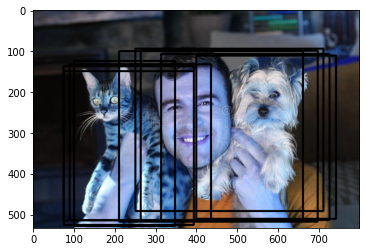

In [15]:
blob = cv2.dnn.blobFromImage(gray_image, 0.003, (512, 512), (0, 0, 0), True)
net.setInput(blob)
outs = net.forward(output_layer)
import numpy as np
class_ids = []
boxes = []
confidences = []
for out in outs:
    for det in out:
        scores = det[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
#         print(confidence)
        if confidence > 0.6:
            cx = int(det[0] * width)
            cy = int(det[1] * height)
            
            w = int(det[2] * width)
            h = int(det[3] * height)
            
            x, y = int(cx - w / 2), int(cy - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            print(class_ids)
            print(confidences)
            print(boxes)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 0), 4)
            
plt.imshow(image)

# Use of Non Maximun Supression 

74 137 319 377
cat
263 99 433 418
person


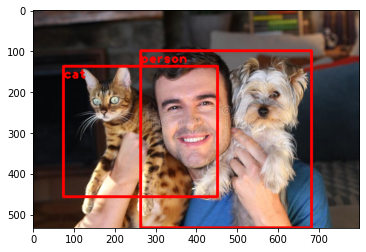

In [16]:
n_det = len(boxes)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

for i in range(n_det):
    if i in indexes:
        x, y, w, h = boxes[i]
        print(x, y, w, h)
        label = str(classes[class_ids[i]])
        print(label)
        cv2.rectangle(gray_image, (x, y), (x+h, y+w), (255, 0, 0), 5)
        cv2.putText(gray_image, label, (x, y+30), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 3)

plt.imshow(gray_image)
